In [1]:
import pandas
import numpy
from RexR import *
import _helpers
Rocket = RexR(datalocation = None, #'_data/genomic_data/data.pkl', 
              seed = 3123, 
              debug = False, 
              write_out=True,
              set_name = 'MELA') # data to read in ALL_10, or MELA
Rocket.load_probeset_data();

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


++++++++++++++++++++++++++++++ Firing up RexR! ++++++++++++++++++++++++++++++


# Classification

In [3]:
METHOD_LIST = ['ExtraTrees', 'CART', 'RandomForest', 'GBM', 'AdaBoost', 'LR', 'SVM', 'NaiveBayes', 'MLNN'] # XGB
Runs = []
nruns = 1
SCALER = "minmax"
GROUPING = "mean"
DIM_TYPE = None # "LDA" # "LDA" # "LDA"
DIM_NUM = 1000
Results = None
ACC = pd.DataFrame()
Rocket.VIZ = False
for i in range(0, nruns):
    Rocket.SEED = np.random.randint(0,10000)
    MODELS  = []
    for idx, METHOD in enumerate(METHOD_LIST):
        preds, class_model, accuracy = Rocket.classify_treatment(model_type = METHOD, 
                                                      features = 'genomic',
                                                      parameters = {},
                                                      pipeline = {"scaler": {"type": SCALER},
                                                                  "pre_processing": {"patient_grouping": GROUPING, 
                                                                                     "bias_removal": False},
                                                                  "dim_reduction": {"type": DIM_TYPE, "n_comp": DIM_NUM},
                                                                  "feature_selection": {"type": "RFECV", "top_n": 100}})
        MODELS.append({'method': METHOD, 'model': class_model})
        ACC = ACC.append(accuracy, ignore_index= True)
        preds = [pred_[1]for pred_ in preds]
        #len(Rocket.DATA_merged[Rocket.DATA_merged["array-batch"].isin(["cohort 1", "cohort 2", "JB", "IA", "ALL-10"])])
        if Results is None:
            Results = Rocket.DATA_merged_processed.copy()
        Results['pred'] = preds
        Results['method'] = METHOD
        if idx == 0:
            AllResults = Results[[Rocket.MODEL_PARAMETERS['ID'], 'pred', 'method', Rocket.MODEL_PARAMETERS['target']]]
        else:
            AllResults = AllResults.append(Results[[Rocket.MODEL_PARAMETERS['ID'], 
                                                    'pred', 
                                                    'method', 
                                                    Rocket.MODEL_PARAMETERS['target']]], 
                                      ignore_index = True)

    ####
    ####

    preds, class_model, accuracy = Rocket.classify_treatment(model_type = "RVM", 
                                                      features = 'genomic',
                                                      parameters = {},
                                                      pipeline = {"scaler": {"type": SCALER},
                                                                  "pre_processing": {"patient_grouping": GROUPING, 
                                                                                     "bias_removal": False},
                                                                  "dim_reduction": {"type": DIM_TYPE, "n_comp": DIM_NUM},
                                                                  "feature_selection": {"type": "RFECV", "top_n": 100}})
    MODELS.append({'method': METHOD, 'model': class_model})
    ACC = ACC.append(accuracy, ignore_index = True)
    Results = Rocket.DATA_merged_processed.copy()
    preds = [pred_ for pred_ in preds]
    Results['pred'] = preds
    Results['method'] = "RVM"
    AllResults = AllResults.append(Results[[Rocket.MODEL_PARAMETERS['ID'], 'pred', 'method', Rocket.MODEL_PARAMETERS['target']]], ignore_index = True)

    ####
    ####

    preds, class_model, accuracy = Rocket.classify_treatment(model_type = "DNN", 
                                                      features = 'genomic',
                                                      parameters = {},
                                                      pipeline = {"scaler": {"type": SCALER},
                                                                  "pre_processing": {"patient_grouping": GROUPING, 
                                                                                     "bias_removal": False},
                                                                  "dim_reduction": {"type": DIM_TYPE, "n_comp": DIM_NUM},
                                                                  "feature_selection": {"type": "RFECV", "top_n": 100}})
    MODELS.append({'method': METHOD, 'model': class_model})
    ACC = ACC.append(accuracy, ignore_index = True)
    Results = Rocket.DATA_merged_processed.copy()
    preds = [pred_ for pred_ in preds]
    Results['pred'] = preds
    Results['method'] = "DNN"
    AllResults = AllResults.append(Results[[Rocket.MODEL_PARAMETERS['ID'], 'pred', 'method', Rocket.MODEL_PARAMETERS['target']]],
                                   ignore_index = True)

    AllResults[Rocket.MODEL_PARAMETERS['ID']] = AllResults[Rocket.MODEL_PARAMETERS['ID']].astype('str')
    AllResults = AllResults.sort_values(by=Rocket.MODEL_PARAMETERS['ID'])
    #AllResults[AllResults['Treatment_risk_group_in_ALL10'].notnull()]
    ####
    ####
    Runs.append(AllResults)



+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Prepping data, this may take a while..
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Grouping probesets
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
MODEL: ET accuracy:  0.89156626506 +/-: 0.00417841932341
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
MODEL: CART accuracy:  0.831325301205 +/-: 0.0229210012742
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
MODEL: RF accuracy:  0.903614457831 +/-: 0.0049727613501

 113 - L= 2.9944406 - Gamma=30.4372320 (M=  36) - s=0.0100
 114 - L= 2.9944406 - Gamma=30.4372451 (M=  36) - s=0.0100
 115 - L= 2.9944406 - Gamma=30.4373428 (M=  36) - s=0.0100
 116 - L= 2.9944406 - Gamma=30.4364944 (M=  36) - s=0.0100
 117 - L= 2.9944406 - Gamma=30.4386393 (M=  36) - s=0.0100
 118 - L= 2.9944406 - Gamma=30.4385744 (M=  36) - s=0.0100
 119 - L= 2.9944407 - Gamma=30.4376387 (M=  36) - s=0.0100
 120 - L= 2.9944407 - Gamma=30.4375697 (M=  36) - s=0.0100
 121 - L= 2.9944407 - Gamma=30.4391528 (M=  36) - s=0.0100
 122 - L= 2.9944407 - Gamma=30.4379110 (M=  36) - s=0.0100
 123 - L= 2.9944407 - Gamma=30.4390231 (M=  36) - s=0.0100
 124 - L= 2.9944407 - Gamma=30.4392099 (M=  36) - s=0.0100
 125 - L= 2.9944407 - Gamma=30.4392034 (M=  36) - s=0.0100
 126 - L= 2.9944407 - Gamma=30.4392092 (M=  36) - s=0.0100
 127 - L= 2.9944407 - Gamma=30.4392083 (M=  36) - s=0.0100
 128 - L= 2.9944407 - Gamma=30.4392080 (M=  36) - s=0.0100
 129 - L= 2.9944408 - Gamma=30.4400948 (M=  36) - s=0.01

C:\Users\Bram van Es\DEV\RexR\rvm.py:289: RuntimeWarning: invalid value encountered in log
  change = np.abs(np.log(newAlpha) - np.log(self.Alpha[j]))


  95 - L= 3.0125599 - Gamma=30.4548073 (M=  34) - s=0.0100
  96 - L= 3.0125798 - Gamma=30.4390262 (M=  34) - s=0.0100
  97 - L= 3.0126044 - Gamma=30.5075810 (M=  35) - s=0.0100
  98 - L= 3.0126163 - Gamma=30.5057769 (M=  35) - s=0.0100
  99 - L= 3.0126273 - Gamma=30.5045169 (M=  35) - s=0.0100
 100 - L= 3.0126397 - Gamma=30.5304397 (M=  35) - s=0.0100
 101 - L= 3.0126540 - Gamma=30.4993036 (M=  35) - s=0.0100
 102 - L= 3.0126632 - Gamma=30.4864499 (M=  35) - s=0.0100
 103 - L= 3.0126705 - Gamma=30.4839657 (M=  35) - s=0.0100
 104 - L= 3.0126777 - Gamma=30.5190191 (M=  35) - s=0.0100
 105 - L= 3.0126886 - Gamma=30.5066104 (M=  35) - s=0.0100
 106 - L= 3.0126949 - Gamma=30.5242400 (M=  35) - s=0.0100
 107 - L= 3.0127019 - Gamma=30.5245671 (M=  35) - s=0.0100
 108 - L= 3.0127074 - Gamma=30.5045558 (M=  35) - s=0.0100
 109 - L= 3.0127119 - Gamma=30.5315556 (M=  35) - s=0.0100
 110 - L= 3.0127161 - Gamma=30.5315110 (M=  35) - s=0.0100
 111 - L= 3.0127199 - Gamma=30.5315038 (M=  35) - s=0.01

  62 - L= 3.0227958 - Gamma=30.5522041 (M=  35) - s=0.0100
  63 - L= 3.0228564 - Gamma=30.5503711 (M=  35) - s=0.0100
  64 - L= 3.0229070 - Gamma=30.5503510 (M=  35) - s=0.0100
  65 - L= 3.0229515 - Gamma=30.4922876 (M=  35) - s=0.0100
  66 - L= 3.0229936 - Gamma=30.4211825 (M=  35) - s=0.0100
  67 - L= 3.0230329 - Gamma=30.4212376 (M=  35) - s=0.0100
  68 - L= 3.0230617 - Gamma=30.4904592 (M=  35) - s=0.0100
  69 - L= 3.0230845 - Gamma=30.5040355 (M=  35) - s=0.0100
  70 - L= 3.0231140 - Gamma=30.4755965 (M=  35) - s=0.0100
  71 - L= 3.0231382 - Gamma=30.4849023 (M=  35) - s=0.0100
  72 - L= 3.0231564 - Gamma=30.4447151 (M=  35) - s=0.0100
  73 - L= 3.0231678 - Gamma=30.4488475 (M=  35) - s=0.0100
  74 - L= 3.0231790 - Gamma=30.4094487 (M=  35) - s=0.0100
  75 - L= 3.0231895 - Gamma=30.4487407 (M=  35) - s=0.0100
  76 - L= 3.0231973 - Gamma=30.4562194 (M=  35) - s=0.0100
  77 - L= 3.0232020 - Gamma=30.4461944 (M=  35) - s=0.0100
  78 - L= 3.0232062 - Gamma=30.4209689 (M=  35) - s=0.01

Initial alpha = [[ 0.02904541]]
   1 - L=-352.9273753 - Gamma= 1.9999537 (M=   2) - s=0.0100
   2 - L=-207.2018583 - Gamma= 2.9998995 (M=   3) - s=0.0100
   3 - L=-153.0920664 - Gamma= 3.9997489 (M=   4) - s=0.0100
   4 - L=-124.4064926 - Gamma= 4.9994796 (M=   5) - s=0.0100
   5 - L=-102.6330224 - Gamma= 5.9990989 (M=   6) - s=0.0100
   6 - L=-76.5721592 - Gamma= 6.9987746 (M=   7) - s=0.0100
   7 - L=-55.0552879 - Gamma= 7.9983692 (M=   8) - s=0.0100
   8 - L=-41.1174108 - Gamma= 8.9977822 (M=   9) - s=0.0100
   9 - L=-31.6027175 - Gamma= 9.9968386 (M=  10) - s=0.0100
  10 - L=-24.2756048 - Gamma=10.9952961 (M=  11) - s=0.0100
  11 - L=-18.6161156 - Gamma=11.9938301 (M=  12) - s=0.0100
  12 - L=-12.4128536 - Gamma=12.9925156 (M=  13) - s=0.0100
  13 - L=-9.5576301 - Gamma=13.9898016 (M=  14) - s=0.0100
  14 - L=-6.4839210 - Gamma=14.9872293 (M=  15) - s=0.0100
  15 - L=-4.1472933 - Gamma=15.9837145 (M=  16) - s=0.0100
  16 - L=-1.8832313 - Gamma=16.9798360 (M=  17) - s=0.0100
  17 - 

Initial alpha = [[ 0.02885493]]
   1 - L=-367.9897813 - Gamma= 1.9999459 (M=   2) - s=0.0100
   2 - L=-254.5565052 - Gamma= 2.9998799 (M=   3) - s=0.0100
   3 - L=-168.4304293 - Gamma= 3.9997506 (M=   4) - s=0.0100
   4 - L=-136.1547580 - Gamma= 4.9994981 (M=   5) - s=0.0100
   5 - L=-100.3669511 - Gamma= 5.9992619 (M=   6) - s=0.0100
   6 - L=-74.5393437 - Gamma= 6.9988928 (M=   7) - s=0.0100
   7 - L=-50.4271872 - Gamma= 7.9985315 (M=   8) - s=0.0100
   8 - L=-37.1887910 - Gamma= 8.9979141 (M=   9) - s=0.0100
   9 - L=-28.7989179 - Gamma= 9.9968054 (M=  10) - s=0.0100
  10 - L=-22.7487156 - Gamma=10.9955143 (M=  11) - s=0.0100
  11 - L=-16.2554968 - Gamma=11.9943299 (M=  12) - s=0.0100
  12 - L=-10.4757248 - Gamma=12.9929381 (M=  13) - s=0.0100
  13 - L=-7.1789044 - Gamma=13.9902729 (M=  14) - s=0.0100
  14 - L=-4.9160036 - Gamma=14.9868606 (M=  15) - s=0.0100
  15 - L=-3.1019619 - Gamma=15.9826243 (M=  16) - s=0.0100
  16 - L=-1.7737541 - Gamma=16.9769078 (M=  17) - s=0.0100
  17 - 

 175 - L= 3.0148328 - Gamma=31.0958329 (M=  37) - s=0.0100
 176 - L= 3.0148343 - Gamma=31.0958092 (M=  37) - s=0.0100
 177 - L= 3.0148354 - Gamma=31.1062970 (M=  37) - s=0.0100
 178 - L= 3.0148366 - Gamma=31.1110995 (M=  37) - s=0.0100
 179 - L= 3.0148376 - Gamma=31.1110789 (M=  37) - s=0.0100
 180 - L= 3.0148384 - Gamma=31.1231331 (M=  37) - s=0.0100
 181 - L= 3.0148393 - Gamma=31.1098280 (M=  37) - s=0.0100
 182 - L= 3.0148411 - Gamma=31.1216269 (M=  37) - s=0.0100
 183 - L= 3.0148413 - Gamma=31.1191317 (M=  36) - s=0.0100
 184 - L= 3.0148426 - Gamma=31.1171210 (M=  36) - s=0.0100
 185 - L= 3.0148439 - Gamma=31.1109477 (M=  36) - s=0.0100
 186 - L= 3.0148446 - Gamma=31.1198484 (M=  36) - s=0.0100
 187 - L= 3.0148452 - Gamma=31.1197560 (M=  36) - s=0.0100
 188 - L= 3.0148459 - Gamma=31.1196896 (M=  36) - s=0.0100
 189 - L= 3.0148465 - Gamma=31.1196988 (M=  36) - s=0.0100
 190 - L= 3.0148471 - Gamma=31.1200977 (M=  36) - s=0.0100
 191 - L= 3.0148476 - Gamma=31.1208723 (M=  36) - s=0.01

 120 - L= 2.9794774 - Gamma=39.5237678 (M=  44) - s=0.0100
 121 - L= 2.9794777 - Gamma=39.5240069 (M=  44) - s=0.0100
 122 - L= 2.9794780 - Gamma=39.5239988 (M=  44) - s=0.0100
 123 - L= 2.9794782 - Gamma=39.5239777 (M=  44) - s=0.0100
 124 - L= 2.9794784 - Gamma=39.5240072 (M=  44) - s=0.0100
 125 - L= 2.9794786 - Gamma=39.5240096 (M=  44) - s=0.0100
 126 - L= 2.9794788 - Gamma=39.5240025 (M=  44) - s=0.0100
 127 - L= 2.9794789 - Gamma=39.5212484 (M=  44) - s=0.0100
 128 - L= 2.9794790 - Gamma=39.5187293 (M=  44) - s=0.0100
 129 - L= 2.9794791 - Gamma=39.5222321 (M=  44) - s=0.0100
 130 - L= 2.9794792 - Gamma=39.5233106 (M=  44) - s=0.0100
 131 - L= 2.9794793 - Gamma=39.5264296 (M=  44) - s=0.0100
 132 - L= 2.9794795 - Gamma=39.5260806 (M=  44) - s=0.0100
 133 - L= 2.9794795 - Gamma=39.5260970 (M=  44) - s=0.0100
 134 - L= 2.9794796 - Gamma=39.5244300 (M=  44) - s=0.0100
 135 - L= 2.9794796 - Gamma=39.5244541 (M=  44) - s=0.0100
 136 - L= 2.9794797 - Gamma=39.5241878 (M=  44) - s=0.01

In [5]:
print("Accuracy on average: {} +- {}, median: {}+-{}".format(ACC.mean()[0], ACC.mean()[1], ACC.median()[0], ACC.median()[1]))
print("+"*40)
print(ACC)

Accuracy on average: 0.8904709748083243 +- 0.005878252826179187, median: 0.9036144578313253+-0.004178419323407495
++++++++++++++++++++++++++++++++++++++++
         acc model       var
0   0.891566    ET  0.004178
1   0.831325  CART  0.022921
2   0.903614    RF  0.004973
3   0.891566   GBM  0.004828
4   0.927711   ADA  0.002260
5   0.927711    LR  0.003766
6   0.927711   SVM  0.003766
7   0.903614   GNB  0.002630
8   0.891566  MLNN  0.005433
9   0.734940   RVM  0.007825
10  0.963855   DNN  0.002080


In [6]:
###########
###########
##Runs.append(AllResults)
final_df = pandas.DataFrame()
for idx, df in enumerate(Runs):
    df['run'] = idx
    final_df = final_df.append(df, ignore_index = True)
final_df = final_df.sort_values(by=Rocket.MODEL_PARAMETERS['ID'])
final_df['pred']= pandas.to_numeric(final_df['pred'])
final_df.to_csv("C:/Users/Bram van Es/DEV/RexR/out/patient_results_"+Rocket.SET_NAME+".csv")
final_df = final_df.groupby([Rocket.MODEL_PARAMETERS['ID'], 'method']).agg({'pred': [numpy.mean, numpy.median, numpy.std]})
final_df.to_csv("C:/Users/Bram van Es/DEV/RexR/out/patient_results_agg_"+Rocket.SET_NAME+".csv")

# Top genomes

In [7]:
# loop through models..
### Tree weights
top_genomes_weights = pandas.DataFrame()
#top_genomes.index = Rocket.DATA_merged_processed
for mod in MODELS:
    if(mod['method'] in ['RandomForest', 'GBM', 'AdaBoost', 'ExtraTrees']): # RF, ET, GBM, ADA
        top_genomes_weights[mod['method']]=mod['model'].feature_importances_
        # column normalise
        top_genomes_weights[mod['method']] = top_genomes_weights[mod['method']]/top_genomes_weights[mod['method']].max()
        
top_genomes_weights.index = Rocket.DATA_merged_processed.drop(['target', 'ID'], axis=1).columns
#top_genomes['ALL'] = top_genomes.sum(axis=1)
top_genomes_weights['MED'] = top_genomes_weights.median(axis=1)
top_genomes_weights = top_genomes_weights.sort_values(by='MED', ascending=False)
       
### Coefficients
top_genomes_coeffs = pandas.DataFrame()
for mod in MODELS:
    if(mod['method'] in ['LR', 'SVM']):
        top_genomes_coeffs[mod['method']] = mod['model'].coef_[0,:]
        top_genomes_coeffs[mod['method']] = top_genomes_coeffs[mod['method']]/top_genomes_coeffs[mod['method']].max() #\
                                                               #  -top_genomes[mod['method']].min())
                                                                 #+numpy.abs(top_genomes[mod['method']].min())
top_genomes_coeffs.index = Rocket.DATA_merged_processed.drop(['target', 'ID'], axis=1).columns
#top_genomes['ALL'] = top_genomes.sum(axis=1)
top_genomes_coeffs['MEAN'] = top_genomes_coeffs.mean(axis=1)
top_genomes_coeffs = top_genomes_coeffs.sort_values(by='MEAN', ascending=False)


In [9]:
top_genomes_coeffs.to_csv("C:/Users/Bram van Es/DEV/RexR/out/coeffs_"+Rocket.SET_NAME+".csv")

In [13]:
top_genomes_weights.to_csv("C:/Users/Bram van Es/DEV/RexR/out/weights_"+Rocket.SET_NAME+".csv")

In [18]:
RF9 = top_genomes_weights['RandomForest'].quantile(q=0.9)
GBM9 = top_genomes_weights['GBM'].quantile(q=0.9)
ADA9 = top_genomes_weights['AdaBoost'].quantile(q=0.9)
ET9 = top_genomes_weights['ExtraTrees'].quantile(q=0.9)
Overlapping_genomes = set(top_genomes_weights.loc[top_genomes_weights['RandomForest']>RF9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['GBM']>GBM9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['AdaBoost']>ADA9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['ExtraTrees']>ET9].index.values)

# Patient clustering

In [2]:
from math import*
#from scipy.dspatial.distance import cosine
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cdist
from decimal import Decimal
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from time import time
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from itertools import cycle

In [5]:
#TransPosed = Rocket.DATA_all_samples.T # all microarrays, may be multiple per patient versus all probesets, may be multiple per genome
Normal = Rocket.DATA_merged_processed.loc[:, (Rocket.DATA_merged_processed.columns !='target') & 
                                             (Rocket.DATA_merged_processed.columns !='ID')]
#AllNormal = Rocket.DATA_merged
#probeset_weights = Rocket.get_probeset_weights(method = )

In [4]:
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.cross_decomposition import CCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Markov clustering

In [10]:
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'cosine', normalised = True, inflation = 2, minkowski_dim=1)
##### apply Markov clustering
#######################
# non-distributed, non-sparse version, only for small-sized problems (N is order 1000)
e = 2
r = 2 
epsilon = 1e-7
convergence = 0.001
num_iter = 10
Orientation = 'col' # columnwise or rowwise

# add loop
def add_loop(df_matrix, value=0): 
    for i in df_matrix.index:
        df_matrix.loc[i, i] = value
    return df_matrix
patient_sim = add_loop(patient_sim, 1)
patient_sim = patient_sim - epsilon

def normalise(sim, type = 'col'):
    if(type == 'col'):
        # column normalisation
        for variable in sim.keys():
            col_vec = sim[variable]
            sum_val = sum([p for p in col_vec])
            sim[variable] = sim[variable]/sum_val
    elif (type == 'row'):
        # row normalisation
        for variable in sim.keys():
            row_vec = sim.loc[variable, :]
            sum_val = sum([p for p in row_vec])
            sim.loc[variable,:] = sim.loc[variable,:]/sum_val
    return sim

# step E: expansion, get the nth power of the matrix
def expansion(sim):
    X = numpy.array(sim)
    VarList = sim.keys()
    if e == 1:
        return sim
    elif e > 1:        
        return pandas.DataFrame(numpy.linalg.matrix_power(X, e), index = VarList, columns = VarList)
     
# step I: inflation, per column raise by rth power and column normalise
def inflation(sim, type = 'col'):    
    if type == 'col':
        Axis = 0
    elif type == 'row':
        Axis = 1
    return sim.apply(lambda x: x**r/sum(x**r), axis = Axis)

# remove weak connections, values < epsilon
def clean(sim):
    return sim.applymap(lambda x:0 if x<epsilon else x)
    
def difference(old, new):
    # relative zeroes over entire array
    #return (new.apply(lambda x: numpy.ceil(x-epsilon)) - old.apply(lambda x: numpy.ceil(x-epsilon))).sum().sum()/len(old)**2    
    return abs(new - old).sum().sum()/len(old)**2    

#patient_sim = normalise(patient_sim, type = Orientation)
_sim_a = patient_sim
for i in range(0,num_iter):
    # repeat E and I until convergence, the row-wise elements form the clusters.
    _sim_b = clean(inflation(expansion(_sim_a), type = Orientation))
    _sim_a = normalise(_sim_a, type = Orientation)
    #if ((difference(_sim_a, _sim_b)) < convergence) & (i>0):
    #    print(difference(_sim_a, _sim_b))
    #    print("CONVERGED after ", i, " iterations")
    #    break;
    _sim_a = _sim_b

result_mcl = clean(_sim_b)
result_mcl.loc[result_mcl.loc['9827_corr2.CEL',:]>epsilon, '9827_corr2.CEL']

Series([], Name: 9827_corr2.CEL, dtype: float64)

## Affinity propagation

In [25]:
from sklearn.cluster import AffinityPropagation
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'pearson', normalised = False, inflation=1, minkowski_dim=1)
##### apply Affinity Propagation
#######################
X = numpy.array(patient_sim)
af = AffinityPropagation(preference=-10).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
patient_clusters = patient_sim.keys()[cluster_centers_indices].values
patient_cluster_members = af.labels_
print("There are {} patient clusters".format(n_clusters))

There are 5 patient clusters


In [28]:
AggResults = Rocket.DATA_merged
AggResults = _helpers._preprocess(AggResults, Rclass = Rocket)
#AggResults = _helpers._group_patients(AggResults, method = 'mean')
AggResults['cluster_ap'] = patient_cluster_members

#AggResults.groupby(['Treatment risk group in ALL10', 'cluster_ap']).agg({'Microarray file': pandas.Series.nunique})


In [11]:
AggResults['FU_RFS'] = pandas.to_numeric(AggResults['FU_RFS'])
AggResults['FU_EFS'] = pandas.to_numeric(AggResults['FU_EFS'])
AggResults['FU_OS'] = pandas.to_numeric(AggResults['FU_OS'])
AggResults['WhiteBloodCellcount'] = pandas.to_numeric(AggResults['WhiteBloodCellcount'])
AggResults['Age'] = pandas.to_numeric(AggResults['Age'])
AggResults['Gender'] = pandas.to_numeric(AggResults['Gender'])
AggResults['code_RFS']= pandas.to_numeric(AggResults['code_RFS'])
AggResults['code_EFS']= pandas.to_numeric(AggResults['code_EFS'])
AggResults['code_OS']= pandas.to_numeric(AggResults['code_OS'])

AggResults['mutations_NOTCH_pathway'] = pandas.to_numeric(AggResults['mutations_NOTCH_pathway'])
AggResults['mutations_PTEN_AKT_pathway'] = pandas.to_numeric(AggResults['mutations_PTEN_AKT_pathway'])
AggResults['mutations_IL7R_pathway'] = pandas.to_numeric(AggResults['mutations_IL7R_pathway'])
#AggResults.replace(to_replace=9999, value=0.5, inplace=True)
AggResults[['mutations_NOTCH_pathway', 
            'mutations_PTEN_AKT_pathway', 
            'mutations_IL7R_pathway']] = AggResults[['mutations_NOTCH_pathway', 
                                                    'mutations_PTEN_AKT_pathway', 
                                                    'mutations_IL7R_pathway']].replace([9999],[numpy.nan],
                                                                                       inplace=False)

c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [12]:
AggResults['comb_mutations_NOTCH_IL7R'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_NOTCH_PTEN'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_PTEN_AKT_pathway']
AggResults['comb_mutations_IL7R_PTEN'] =  AggResults['mutations_PTEN_AKT_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_IL7R_PTEN_NOTCH'] =  AggResults['mutations_PTEN_AKT_pathway']\
                                                + AggResults['mutations_IL7R_pathway']\
                                                + AggResults['mutations_NOTCH_pathway']


patient_count = AggResults.groupby(['cluster_ap']).agg({'labnr_patient': pandas.Series.nunique})
Clustered_by_patients_whitebloodcells = AggResults[AggResults['WhiteBloodCellcount'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'WhiteBloodCellcount': numpy.mean,
    'Age': numpy.mean, 
    'Gender': numpy.mean})

# Cancer_gene
# Treatment_protocol
# Treatment_risk_group_in_ALL_10

Clustered_by_patients_CODE = AggResults.groupby(['cluster_ap']).agg(
    {'code_RFS': numpy.mean, 
     'code_EFS': numpy.mean,
     'code_OS': numpy.mean})

Clustered_by_patients_FU_RFS = AggResults[AggResults['FU_RFS'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'FU_RFS': numpy.median, 
     'FU_EFS': numpy.median,
     'FU_OS': numpy.median})
Clustered_by_patients_NotchPath = AggResults[AggResults['mutations_NOTCH_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_NOTCH_pathway': numpy.mean})
Clustered_by_patients_IL7RPath = AggResults[AggResults['mutations_IL7R_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_IL7R_pathway': numpy.mean})
Clustered_by_patients_PTENAKTPath = AggResults[AggResults['mutations_PTEN_AKT_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_PTEN_AKT_pathway': numpy.mean})
Clustered_by_patients_comb_NOTCH_IL7R = AggResults[AggResults['comb_mutations_NOTCH_IL7R'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_IL7R': numpy.mean})
Clustered_by_patients_comb_NOTCH_PTEN = AggResults[AggResults['comb_mutations_NOTCH_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN = AggResults[AggResults['comb_mutations_IL7R_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN_NOTCH = AggResults[AggResults['comb_mutations_IL7R_PTEN_NOTCH'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN_NOTCH': numpy.mean})


c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [13]:
cluster_agg = pandas.merge(Clustered_by_patients_whitebloodcells, Clustered_by_patients_CODE, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN_NOTCH, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_IL7R, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_PTEN, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_FU_RFS, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_IL7RPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_NotchPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_PTENAKTPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, patient_count, how='inner', left_index=True, right_index=True)


In [ ]:
print("Cluster centers:",patient_sim.keys()[cluster_centers_indices].values)
print(patient_cluster_members)

plt.close('all')
plt.figure(figsize=(14,9))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = patient_cluster_members == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.', 
             label = patient_sim.keys()[cluster_centers_indices[k]])
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.legend()
        
plt.title('Estimated number of clusters from Affinity Propagation: %d' % n_clusters)
plt.show()

In [19]:
##### CREATE graph from similarity matrix
##################
# nodes
VarList = TransPosed.keys()
nodes = []
node_index = 0
for patient_name in VarList:
    nodes.append((node_index, {'name': patient_name}))
    node_index = node_index + 1

edges = []
# edges
patient_sim = patient_similarity(Normal, sim_type = 'pearson', normalised = True, inflation=2)
node_index_x = 0
node_index_y = 0
for patient_name_x in VarList:
    for patient_name_y in VarList:        
        edges.append((node_index_x, node_index_y, patient_sim.iloc[node_index_x, node_index_y]))
        node_index_y = node_index_y + 1
    node_index_x = node_index_x + 1
    node_index_y = 0

In [20]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges, weight = 'weight')

c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

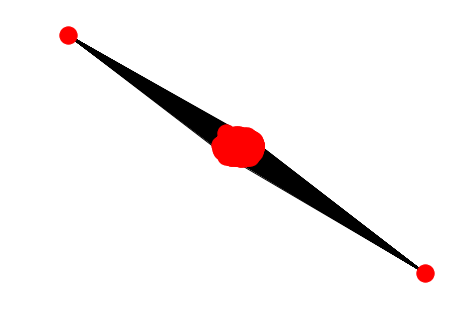

In [23]:
##### apply Spring-force
#######################
pos = nx.spring_layout(G, k = None, dim = 3, scale = 1.0)
nx.draw_spring(G, k = 30, dim = 2, scale = 1.0, iterations =1500)
plt.show()

In [ ]:
##### APPLY community detector
# maximize betweenness and modularity
##################################


In [12]:
##### LOAD IN DATA
###################
# https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns
# 